In [1]:
!gdown 1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt

Downloading...
From (original): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt
From (redirected): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt&confirm=t&uuid=b23e4196-930e-48b9-9f75-a868a80628ec
To: /content/CupIT_Sber_data.csv
100% 230M/230M [00:03<00:00, 64.2MB/s]


In [2]:




import pandas as pd
data = pd.read_csv('/content/CupIT_Sber_data.csv', sep=';')


In [3]:
data.head(10)

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00.0000000,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00.0000000,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0
5,0x9792A4526F5FAFFA2537A6526B6AC23C,0xE02E4412BB1F637FC4CDAFC793C4F7A4,2022-01-01 12:31:00.0000000,1720,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x129AB4F27EAA6C675A4E116AB616FE48,0x95758EBA87326C4D5DECC8B51A8B9C61,0
6,0x750447893A808F22D0E7BEBDADB58999,0xC97D0DF950D35FA4AF2655D749259B36,2022-01-01 12:46:00.0000000,1160,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x887078A50C93C3DFCCF23B6656BF767B,0x780F9A97F1A590D0CE88314FC065E5C8,0
7,0x07EA51E045B591DC5FBA5C1E6D7DEA4B,0x04848F8B05C6935CCECC26FB024BDC6E,2022-01-01 12:41:00.0000000,1720,0x405E158AE7F0523296EB12EECD73CD79,0x82078385014C595F44D63882A268F47A,0x95758EBA87326C4D5DECC8B51A8B9C61,0
8,0x32B405A9613D446FF83E2E73867A1B49,0xBBAF849258EA3A4CE4B58D2C7686775C,2022-01-01 12:55:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0x54054703A9278593F2C779D0E128A3A6,0x95758EBA87326C4D5DECC8B51A8B9C61,0
9,0x13781E636B106FF5B49921B1412BF3F5,0x8D8D44EEDA40B1AE7B659A5A738BF4F3,2022-01-01 12:59:00.0000000,312,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0


In [4]:
data.sort_values(by='service_date')

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
209,0x52EC5F105E1A112873CE07084FEE2244,0xAE125696322F73FD958DF6FE423A38F5,2022-01-01 12:20:00.0000000,425,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xBD46A7B2FCD9FC493D8E2EDBE225C9D1,0x01D029DF0704C6B5891DF7C601181E4D,0
208,0x70DD8F04A3C25809711899976DB2E8BA,0x85693A3739998C3F26FA037A6C7DC77E,2022-01-01 12:20:00.0000000,1921,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xD913F10965FA2B60C031D03112BD3D02,0x7AE965F70DAE2CDB24F3B08C0B4C6CE8,0
206,0xD73A30C89136B625560F01F20F642148,0x476385497B98C5D85BBB966E8BCB3319,2022-01-01 12:20:00.0000000,"1640,5",0x4722B1782AB7DC9B16B2CC933C2A9E52,0x1CFFA4B1194317ABBF88267E29739718,0x9A574462105283982706076B43E656BD,0
...,...,...,...,...,...,...,...,...
1090977,0x8EEF0D22F0F1B091608B6231133C8DD4,0x500BDC514F2A9C63F9C1968A0B7CE2C0,2023-12-31 17:34:00.0000000,"13,71",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x2165571DB4EF41EECCD050DD1C4FABAA,0xFC98F1E83B20FA30BEC6DF7BB4D02D74,0
1090968,0xBF7CBE9DAB91FE33214440D65CB8CA06,0x9C7000465DE80BB0C1613E44CF368DCD,2023-12-31 17:34:00.0000000,"1518,07",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
1090967,0x8AC66E4A3F207ACCEF340C6ACA3C11A6,0xFAA7695E600E871E9CD64EC250D5D4EC,2023-12-31 17:34:00.0000000,7138,0xCAD93EDD7E8593190FB7D3728D66D1BD,0xA5B4D2DDE961BEFC2BAC5E8960382A6E,0x834A7BF96A7A752F8D58493F50C9D8CB,0
1090970,0x836224ABD4E4279297958899C88B57E5,0x3A7408F89C37D813F95C5DE6B9CB10D3,2023-12-31 18:48:00.0000000,13500,0x654E6D737A7C1A4906758D4EF75C6076,0x3E6A29A25856B94A9BA989AC6D182545,0x266F51CD4CE99C60838643DC48070979,0


In [5]:
data.describe()

,is_hospital
count,1.091043e+06
mean,9.259488e-02
std,2.898640e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091043 entries, 0 to 1091042
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   service_document_id  1091043 non-null  object
 1   account_document_id  1091043 non-null  object
 2   service_date         1091043 non-null  object
 3   service_amount_net   1091043 non-null  object
 4   patient_id           1091043 non-null  object
 5   service_code         1091043 non-null  object
 6   service_name         1091043 non-null  object
 7   is_hospital          1091043 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 66.6+ MB


In [7]:
def add_date_time_columns(df, date_column):
    """
    Добавляет новые колонки в DataFrame на основе колонки с датой и временем.

    Параметры:
        df (pd.DataFrame): Исходный DataFrame.
        date_column (str): Название колонки с датой и временем.

    Возвращает:
        pd.DataFrame: DataFrame с новыми колонками.
    """
    # Преобразуем колонку в datetime, если она еще не в этом формате
    df[date_column] = pd.to_datetime(df[date_column])

    # Создаем новые колонки
    df['year'] = df[date_column].dt.year  # Год
    df['month'] = df[date_column].dt.month  # Месяц
    df['date'] = df[date_column].dt.date  # Дата (год, месяц, день)
    df['time'] = df[date_column].dt.time  # Время (часы, минуты, секунды)
    df['hour'] = df[date_column].dt.hour # часы
    df['day'] = df[date_column].dt.day # дни

    return df

In [8]:
data = add_date_time_columns(data, 'service_date')

In [9]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1


In [10]:
#день недели
from datetime import datetime
import numpy as np
days_ru = {
    0: "ПН",
    1: "ВТ",
    2: "СР",
    3: "ЧТ",
    4: "ПТ",
    5: "СБ",
    6: "ВС"
}
data['weekday_name'] = np.vectorize(lambda x: days_ru[x.weekday()])(data['date'])
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ


In [11]:
#выходные
#1-выходной, 0-нет

def wknd(x):
    if x == 'СБ' or x == 'ВС':
        return 1
    else:
        return 0
data['weekends'] = np.vectorize(wknd)(data['weekday_name'])
data.head()


,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1


In [12]:
#праздники
#1-праздник, 0-нет
def hld(x):
    m = [
        '2022-01-01',
        '2022-01-02',
        '2022-01-03',
        '2022-01-04',
        '2022-01-05',
        '2022-01-06',
        '2022-01-07',
        '2022-01-08',
        '2022-02-23',
        '2022-03-08',
        '2022-05-01',
        '2022-05-09',
        '2022-06-12',
        '2022-11-04',
        '2022-05-03',
        '2022-05-10',
        '2022-03-07',
        '2023-01-01',
        '2023-01-02',
        '2023-01-03',
        '2023-01-04',
        '2023-01-05',
        '2023-01-06',
        '2023-01-07',
        '2023-01-08',
        '2023-02-23',
        '2023-03-08',
        '2023-05-01',
        '2023-05-09',
        '2023-06-12',
        '2023-11-04',
        '2023-02-24',
        '2023-05-08'
    ]
    if x in m:
        return 1
    else:
        return 0
data['holidays'] = np.vectorize(hld)(data['date'].astype(str))

In [13]:
data['service_amount_net'] = data['service_amount_net'].str.replace(',', '.', regex=False)

In [14]:
data['service_amount_net'] = data['service_amount_net'].astype(float)

In [15]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends,holidays
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1,1


In [16]:
def add_service_code_statistics(df):
    """
    Добавляет колонки service_code_mean, service_code_median, service_code_std
    в DataFrame на основе уникальных значений service_code.

    Параметры:
        df (pd.DataFrame): Исходный DataFrame.

    Возвращает:
        pd.DataFrame: DataFrame с новыми колонками.
    """
    # Группируем данные по service_code и вычисляем статистику
    grouped = df.groupby('service_code')['service_amount_net'].agg(
        service_code_mean='mean',
        service_code_median='median',
        service_code_std='std'
    ).reset_index()

    # Объединяем исходный DataFrame с вычисленной статистикой
    df = df.merge(grouped, on='service_code', how='left')

    return df

In [17]:
data = add_service_code_statistics(data)

In [18]:
data['service_code_std'] = data['service_code_std'].fillna(0)

In [19]:
def add_service_name_statistics(df):
    """
    Добавляет колонки service_code_mean, service_code_median, service_code_std
    в DataFrame на основе уникальных значений service_code.

    Параметры:
        df (pd.DataFrame): Исходный DataFrame.

    Возвращает:
        pd.DataFrame: DataFrame с новыми колонками.
    """
    # Группируем данные по service_code и вычисляем статистику
    grouped = df.groupby('service_name')['service_amount_net'].agg(
        service_name_mean='mean',
        service_name_median='median',
        service_name_std='std'
    ).reset_index()

    # Объединяем исходный DataFrame с вычисленной статистикой
    df = df.merge(grouped, on='service_name', how='left')

    return df

In [20]:
data = add_service_name_statistics(data)
data['service_name_std'] = data['service_name_std'].fillna(0)
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,...,day,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2288.290331,2104.0,844.972010,2736.985463,2208.0,2045.034290
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,...,1,СБ,1,1,5176.288072,4639.8,2189.748316,5176.288072,4639.8,2189.748316
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,...,1,СБ,1,1,1682.299101,1395.2,925.269174,2388.233015,1453.5,2341.395651
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,...,1,СБ,1,1,1725.591607,1700.0,544.285041,1725.591607,1700.0,544.285041
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2353.000907,2104.0,1157.653136,2736.985463,2208.0,2045.034290


In [21]:
data['delta_time'] = data.groupby('service_document_id')['service_date'].transform(lambda x: x.max() - x.min())
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,...,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time
298369,0x15075263622836BE21F6ACB4FA8E4BF3,0xE3AD0B25AAB74181C30E1895104D2C04,2022-07-31 18:07:00,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,...,ВС,1,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394920,0x15075263622836BE21F6ACB4FA8E4BF3,0x025EEF6559D288810B72E30DA01C72BC,2022-10-06 15:57:31,-2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394921,0x15075263622836BE21F6ACB4FA8E4BF3,0xC957FFB34F7C95C41DA082B6ECB21592,2022-10-06 15:57:31,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394922,0x15075263622836BE21F6ACB4FA8E4BF3,0x5220BB151561EBCC97CE43EAFC084896,2022-10-06 15:57:57,-2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394923,0x15075263622836BE21F6ACB4FA8E4BF3,0x6B0CF840E51EF9A9B86E19CB514FB490,2022-10-06 15:57:57,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57


In [22]:
data['correction_count'] = data.groupby('service_document_id')['service_amount_net'].transform('count')
data['amount_std'] = data.groupby('service_document_id')['service_amount_net'].transform('std')

In [23]:
data['correction_count'].value_counts()

,count
correction_count,
1,1077530
2,11996
3,1512
5,5


In [24]:
# df = data.groupby('service_document_id')['service_amount_net'].agg('sum')
# df

In [25]:
result_data = data.groupby('service_document_id', as_index=False).agg({
    'service_amount_net': 'sum',
    'service_date': 'first'
})

In [26]:
result_data.loc[result_data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,service_amount_net,service_date
89380,0x15075263622836BE21F6ACB4FA8E4BF3,2876.0,2022-07-31 18:07:00


In [27]:
merged_df = pd.merge(result_data, data, on='service_document_id', suffixes=('_agg', '_original'))

data = merged_df.drop_duplicates(subset='service_document_id')
data.drop(columns=['service_date_original', 'service_amount_net_original'], inplace=True)

<ipython-input-27-fe787a764f23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['service_date_original', 'service_amount_net_original'], inplace=True)


In [28]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,service_amount_net_agg,service_date_agg,account_document_id,patient_id,service_code,service_name,is_hospital,year,month,...,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time,correction_count,amount_std
89984,0x15075263622836BE21F6ACB4FA8E4BF3,2876.0,2022-07-31 18:07:00,0xE3AD0B25AAB74181C30E1895104D2C04,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,...,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57,5,3150.500151


In [29]:
data = data.rename(columns={'service_amount_net_agg': 'service_amount_net', 'service_date_agg': 'service_date'})
data

,service_document_id,service_amount_net,service_date,account_document_id,patient_id,service_code,service_name,is_hospital,year,month,...,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time,correction_count,amount_std
0,0x000016C54759E322AB2DF3CB8F8E40B2,2337.5,2022-01-23 11:44:00,0x47DBA428BB3ABED3574F0E692861F3D0,0xA9A8B0F7A3CB1ACA3ED719C206DAA412,0x54054703A9278593F2C779D0E128A3A6,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,0,2276.728608,2104.00,832.870468,2736.985463,2208.00,2045.034290,0 days,1,NaN
1,0x00001FB9CEC8ABEEA189D32E6048EAA6,296.0,2022-09-23 08:16:00,0x8082B69F9F9BD027DCAB22FE0F642FC3,0x7D1A8EC85C60A872D1A1B2B063BD9299,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0,2022,9,...,0,348.111667,331.50,143.526217,349.061689,331.50,143.875442,0 days,1,NaN
2,0x0000240CBF0440CB1BB75046E75111BF,2833.6,2022-07-27 12:54:00,0x74C65515BC32E0C56CBFE9DDC31C2772,0x20C1A2C6DE962CC37FF375C1DCFB1C94,0x05EC231290D0034ED6DABA918BE83A82,0xA7AB68E942204E8F7B65D9BE0FF048F9,0,2022,7,...,0,4104.137033,3864.00,1483.363837,3922.883921,3736.80,1502.594652,0 days,1,NaN
3,0x0000707B2C632D6BE33F5800FB4B341D,1118.4,2022-08-25 19:36:00,0x2BDC318559F329B6019DF4BC64719A96,0xD35D4B33D44436E9E48B72CDA0B44863,0xD2D3E01D92CA13192A87FA427ABB4F8B,0xA2BDFCF3FEF436081FAA7EFC11E9C2F3,0,2022,8,...,0,1319.329926,1324.80,391.417747,1319.329926,1324.80,391.417747,0 days,1,NaN
4,0x000070D8EC8503CB41D2164FC694F541,400.0,2022-11-27 15:32:00,0xF8939271C951971DF869839CB6E3D990,0x4DBBA946EA4F673F52231FFEE11DC7D9,0xC0648CF805184F2731849993EABDCA8C,0x7BDEF615E9C1BA035977A12D03C8A28C,0,2022,11,...,0,508.996253,496.00,166.461959,502.724651,486.40,182.131307,0 days,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091038,0xFFFF9423AC1C6AEC3323F2E9E0D4606B,3152.0,2022-08-02 11:57:00,0xAC3A31761C78784AA21958203CF66B2B,0xBF2917D3A938AC936604F09ECB9A1756,0x0F94290D379321B128826096A2C4E1EA,0xC58693658D60CAD94C79C665747CCCB8,0,2022,8,...,0,4063.393315,3535.00,2086.252287,2978.063649,2324.00,2204.363275,0 days,1,NaN
1091039,0xFFFF9C67B7D4143E69AB051B6BCC65D1,1997.6,2023-05-05 09:40:00,0x14A3039CF2DA472EFBDBE56EDE57B973,0x0B6968A70783F2C6745A08E0866B5747,0x332E8D3220A5317B23558A5E79CE00E4,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2023,5,...,0,2490.246355,2440.00,842.303649,2736.985463,2208.00,2045.034290,0 days,1,NaN
1091040,0xFFFFB3CE7B8823BA5F2DAD4842C00A17,2150.0,2022-05-05 10:08:00,0x5E6B4FDDEDF24C362588A6F1798BCD2F,0xD1BE9ADB9030CA63CFA970915B29B834,0x88279E546FF3469C6DE326908DDC010C,0x8B079834541542B443EDB050A3F6ABD6,0,2022,5,...,0,1263.837500,1694.55,996.328156,1263.837500,1694.55,996.328156,0 days,1,NaN
1091041,0xFFFFCDC1B7068FEA00351309E3B7DDFC,309.6,2023-02-02 08:53:00,0xE608834F64F069D2579DA969C82A600D,0x0D29E4EC799B80DD303AACCB3ADD68DA,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0,2023,2,...,0,348.111667,331.50,143.526217,349.061689,331.50,143.875442,0 days,1,NaN


In [30]:
data = data.loc[data['service_amount_net'] >= 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082822 entries, 0 to 1091042
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   service_document_id  1082822 non-null  object         
 1   service_amount_net   1082822 non-null  float64        
 2   service_date         1082822 non-null  datetime64[ns] 
 3   account_document_id  1082822 non-null  object         
 4   patient_id           1082822 non-null  object         
 5   service_code         1082822 non-null  object         
 6   service_name         1082822 non-null  object         
 7   is_hospital          1082822 non-null  int64          
 8   year                 1082822 non-null  int32          
 9   month                1082822 non-null  int32          
 10  date                 1082822 non-null  object         
 11  time                 1082822 non-null  object         
 12  hour                 1082822 non-null  int32   

In [31]:
data['amount_std'] = data['amount_std'].fillna(0)

<ipython-input-31-94c3587b92dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amount_std'] = data['amount_std'].fillna(0)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082822 entries, 0 to 1091042
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   service_document_id  1082822 non-null  object         
 1   service_amount_net   1082822 non-null  float64        
 2   service_date         1082822 non-null  datetime64[ns] 
 3   account_document_id  1082822 non-null  object         
 4   patient_id           1082822 non-null  object         
 5   service_code         1082822 non-null  object         
 6   service_name         1082822 non-null  object         
 7   is_hospital          1082822 non-null  int64          
 8   year                 1082822 non-null  int32          
 9   month                1082822 non-null  int32          
 10  date                 1082822 non-null  object         
 11  time                 1082822 non-null  object         
 12  hour                 1082822 non-null  int32   

In [33]:
!pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.9 MB/s eta 0:00:00


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

In [35]:
!pip install statsmodels

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

data_linear = data.drop(columns=['service_document_id', 'account_document_id', 'time', 'service_code_median', 'service_name_std', 'service_name_mean', 'service_name_median', 'service_code_std'])

round_to_month = data_linear['service_date'].dt.to_period('M') #.dt.to_timestamp()
data_linear["service_date_month"] = round_to_month.dt.strftime('%Y-%m')

data_linear = data_linear.sort_values(by='service_date')
#data_linear = data_linear.drop(columns=['service_date'])

oe = OrdinalEncoder()
data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']] = oe.fit_transform(data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']])

data_linear = data_linear.set_index('service_date') # service_date_month
data_linear['delta_seconds'] = data_linear['delta_time'].dt.total_seconds()
data_linear = data_linear.drop(columns=['delta_time'])

data_linear.index = data_linear.index.floor('H')
data_linear.head()
data_linear.info()
# X = data_linear.drop(columns='service_amount_net')
# y = data_linear['service_amount_net']





# X = X.set_index('date')
# X


<ipython-input-37-354cfdd70ae0>:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_linear.index = data_linear.index.floor('H')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1082822 entries, 2022-01-01 12:00:00 to 2023-12-31 18:00:00
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   service_amount_net  1082822 non-null  float64
 1   patient_id          1082822 non-null  float64
 2   service_code        1082822 non-null  float64
 3   service_name        1082822 non-null  float64
 4   is_hospital         1082822 non-null  int64  
 5   year                1082822 non-null  int32  
 6   month               1082822 non-null  int32  
 7   date                1082822 non-null  object 
 8   hour                1082822 non-null  int32  
 9   day                 1082822 non-null  int32  
 10  weekday_name        1082822 non-null  float64
 11  weekends            1082822 non-null  int64  
 12  holidays            1082822 non-null  int64  
 13  service_code_mean   1082822 non-null  float64
 14  correction_count    1082822 non-n

In [38]:
aggregated_data = data_linear.resample('D').agg({
    'service_amount_net': 'sum',
    'is_hospital': 'sum',
    'weekday_name': 'first',
    'weekends': 'first',
    'holidays': 'first',
    'service_code_mean': 'sum', # mean
    'delta_seconds': 'mean',
    'correction_count': 'sum',
    'amount_std': 'mean',
    'service_date_month': 'first',
    'date': 'first'
})
aggregated_data

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month,date
service_date,,,,,,,,,,,
2022-01-01,205120.00,0,4.0,1,1,2.023296e+05,0.000000e+00,80,0.000000,2022-01,2022-01-01
2022-01-02,623327.09,44,0.0,1,1,6.034493e+05,7.795167e+04,350,25.894738,2022-01,2022-01-02
2022-01-03,1134685.94,14,2.0,0,1,1.123005e+06,2.938890e+05,622,54.051556,2022-01,2022-01-03
2022-01-04,1121704.72,34,1.0,0,1,1.165825e+06,8.723215e+05,602,48.681750,2022-01,2022-01-04
2022-01-05,1527609.83,53,5.0,0,1,1.570067e+06,1.099878e+06,877,78.184331,2022-01,2022-01-05
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4571180.39,112,5.0,0,0,4.419597e+06,0.000000e+00,1702,0.000000,2023-12,2023-12-27
2023-12-28,3503689.85,64,6.0,0,0,3.401974e+06,0.000000e+00,1458,0.000000,2023-12,2023-12-28
2023-12-29,3089895.15,34,3.0,0,0,2.940942e+06,0.000000e+00,1317,0.000000,2023-12,2023-12-29


In [39]:
aggregated_data.isna().sum()
# aggregated_data[aggregated_data['weekday_name'].isna()]

,0
service_amount_net,0
is_hospital,0
weekday_name,0
weekends,0
holidays,0
service_code_mean,0
delta_seconds,0
correction_count,0
amount_std,0
service_date_month,0


In [ ]:
#день недели
from datetime import datetime
import numpy as np
days_ru = {
    0: "ПН",
    1: "ВТ",
    2: "СР",
    3: "ЧТ",
    4: "ПТ",
    5: "СБ",
    6: "ВС"
}
aggregated_data['weekday_name'] = np.vectorize(lambda x: days_ru[x.weekday()])(aggregated_data['date'])
aggregated_data.head()

In [ ]:
# hours = aggregated_data.index.hour

# # Заполняем пропуски в зависимости от часа
# for col in ['weekday_name', 'weekends', 'holidays', 'service_date_month']:
#     # Заполняем пропуски для часов с 01 до 23 предыдущими значениями
#     aggregated_data[col] = aggregated_data[col].mask((hours >= 1) & (hours <= 23)).fillna(method='ffill')

#     # Заполняем пропуски для часа 00 следующими значениями
#     aggregated_data[col] = aggregated_data[col].mask(hours == 0).fillna(method='bfill')

<ipython-input-129-9d031ff4eea1>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_data[col] = aggregated_data[col].mask((hours >= 1) & (hours <= 23)).fillna(method='ffill')
<ipython-input-129-9d031ff4eea1>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_data[col] = aggregated_data[col].mask(hours == 0).fillna(method='bfill')
<ipython-input-129-9d031ff4eea1>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_data[col] = aggregated_data[col].mask((hours >= 1) & (hours <= 23)).fillna(method='ffill')
<ipython-input-129-9d031ff4eea1>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_data[col] = aggre

In [ ]:
aggregated_data[100:150]

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month
service_date,,,,,,,,,,
2022-01-05 16:00:00,49482.25,0,5.0,0.0,1.0,1482.436624,5.215527e+05,47,202.429744,2022-01
2022-01-05 17:00:00,25960.36,0,5.0,0.0,1.0,1301.337916,0.000000e+00,24,0.000000,2022-01
2022-01-05 18:00:00,5236.00,0,5.0,0.0,1.0,5117.706042,0.000000e+00,1,0.000000,2022-01
2022-01-05 19:00:00,0.00,0,5.0,0.0,1.0,NaN,NaN,0,NaN,2022-01
2022-01-05 20:00:00,0.00,0,5.0,0.0,1.0,NaN,NaN,0,NaN,2022-01
2022-01-05 21:00:00,0.00,0,5.0,0.0,1.0,NaN,NaN,0,NaN,2022-01
2022-01-05 22:00:00,4100.00,0,5.0,0.0,1.0,2084.219395,0.000000e+00,2,0.000000,2022-01
2022-01-05 23:00:00,8030.00,0,5.0,0.0,1.0,7104.909732,0.000000e+00,1,0.000000,2022-01
2022-01-06 00:00:00,0.00,0,5.0,0.0,1.0,NaN,NaN,0,NaN,2022-01


In [ ]:
# new_index = data_linear.index.to_series()

# # Извлекаем только дату (без времени) для группировки
# dates_only = new_index.dt.date

# # Находим дубликаты внутри каждой даты
# duplicates = new_index.duplicated(keep='first')

# # Группируем по датам и вычисляем кумулятивную сумму дубликатов внутри каждой группы
# cumulative_milliseconds = duplicates.groupby(dates_only).cumsum()

# # Добавляем миллисекунды ко всем дубликатам
# new_index += pd.to_timedelta(cumulative_milliseconds * 1, unit='S')

# # Обновляем индекс DataFrame
# data_linear.index = pd.DatetimeIndex(new_index)
# data_linear

In [40]:
print(aggregated_data.index.duplicated().sum())

0


In [ ]:
aggregated_data = aggregated_data.asfreq('D')
aggregated_data.asfreq('D')

,service_amount_net,is_hospital,weekday_name,weekends,holidays,service_code_mean,delta_seconds,correction_count,amount_std,service_date_month
service_date,,,,,,,,,,
2022-01-01,205120.00,0,4.0,1,1,2529.119843,0.000000e+00,80,0.000000,2022-01
2022-01-02,623327.09,44,0.0,1,1,1734.049745,7.795167e+04,350,25.894738,2022-01
2022-01-03,1134685.94,14,2.0,0,1,1847.047360,2.938890e+05,622,54.051556,2022-01
2022-01-04,1121704.72,34,1.0,0,1,2089.292357,8.723215e+05,602,48.681750,2022-01
2022-01-05,1527609.83,53,5.0,0,1,1962.583537,1.099878e+06,877,78.184331,2022-01
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4571180.39,112,5.0,0,0,2596.708264,0.000000e+00,1702,0.000000,2023-12
2023-12-28,3503689.85,64,6.0,0,0,2333.315560,0.000000e+00,1458,0.000000,2023-12
2023-12-29,3089895.15,34,3.0,0,0,2233.061269,0.000000e+00,1317,0.000000,2023-12


In [ ]:
# data_linear = data_linear.dropna()

In [41]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2022-01-01 to 2023-12-31
Freq: D
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   service_amount_net  730 non-null    float64
 1   is_hospital         730 non-null    int64  
 2   weekday_name        730 non-null    float64
 3   weekends            730 non-null    int64  
 4   holidays            730 non-null    int64  
 5   service_code_mean   730 non-null    float64
 6   delta_seconds       730 non-null    float64
 7   correction_count    730 non-null    int64  
 8   amount_std          730 non-null    float64
 9   service_date_month  730 non-null    object 
 10  date                730 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 84.6+ KB


In [65]:
aggregated_data['service_amount_net'].mean()

np.float64(3493863.6532054795)

Критерий Дики-Фуллера: p=0.006599


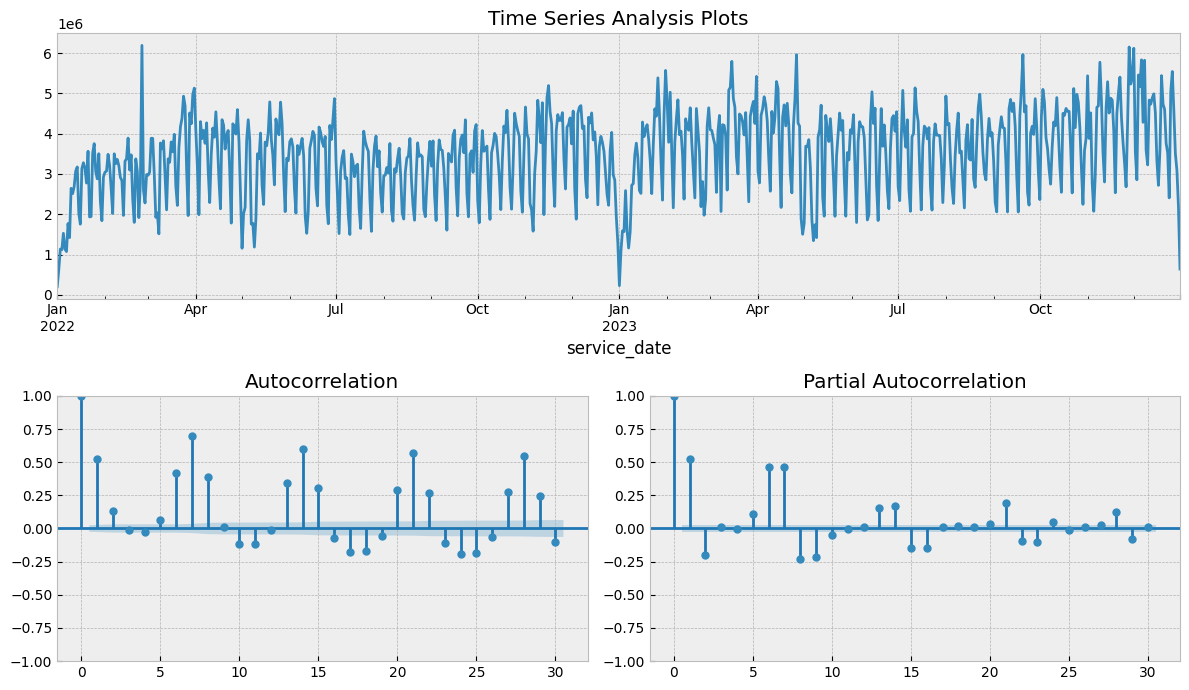

In [209]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Функция для анализа временного ряда
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return

# Пример вызова функции
tsplot(aggregated_data['service_amount_net'], lags=30)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  546
Model:               SARIMAX(1, 0, 4)   Log Likelihood                 202.980
Date:                Sat, 29 Mar 2025   AIC                           -383.960
Time:                        14:53:51   BIC                           -336.631
Sample:                             0   HQIC                          -365.458
                                - 546                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.142e-05      0.000      0.291      0.771      -0.000       0.000
x1             1.0087      0.019     53.753      0.000       0.972       1.045
x2            -0.0233      0.020     -1.161      0.2

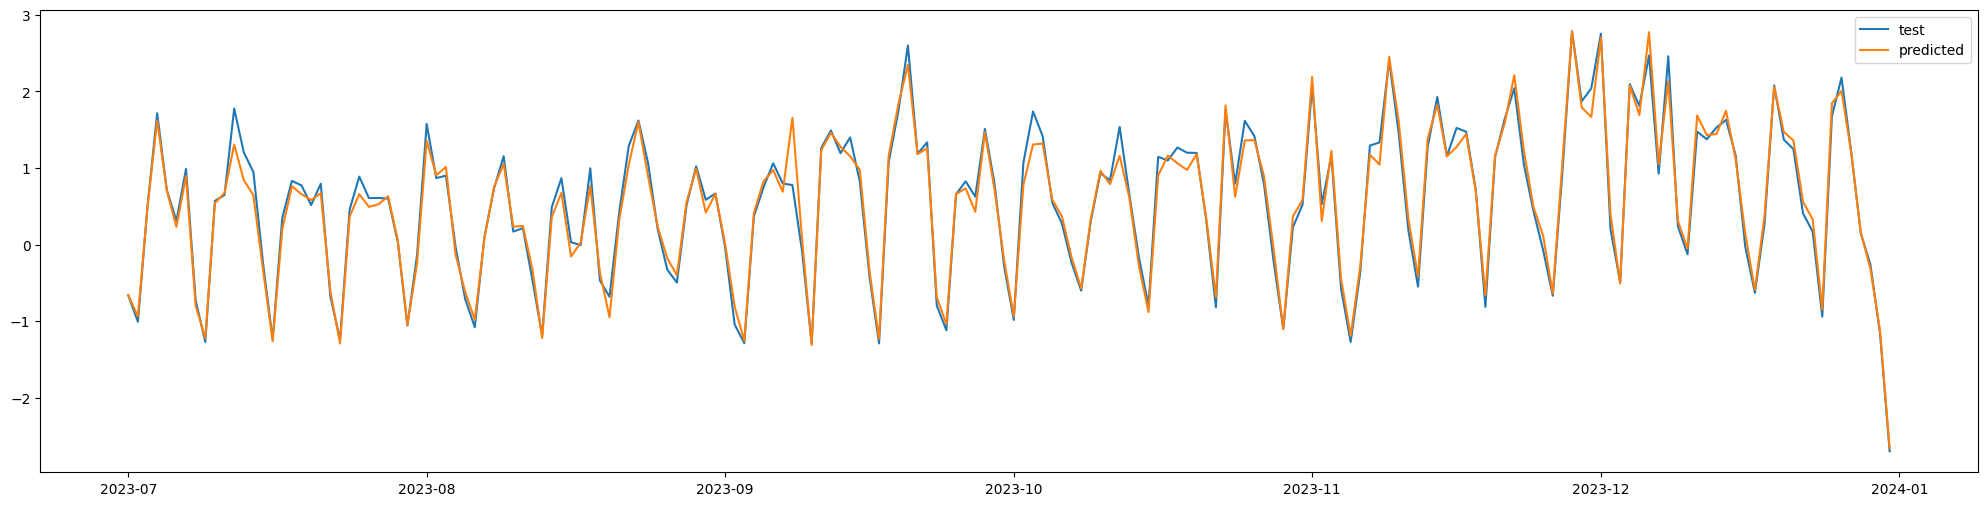

In [211]:
unique_months = aggregated_data['service_date_month'].unique()

train_months = unique_months[:18]
test_months = unique_months[-6:]

X_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_train.drop(columns=['service_date_month'])
X_test.drop(columns=['service_date_month'])

y_train = X_train[['service_amount_net']]
y_test = X_test[['service_amount_net']]

X_train_ex=X_train[['service_code_mean', 'correction_count', 'amount_std', 'is_hospital']] # 'delta_seconds'
X_test_ex=X_test[['service_code_mean', 'correction_count', 'amount_std', 'is_hospital']] # 'delta_seconds'

#'year', 'month', 'hour', 'day', 'weekday_name', 'weekends',  'holidays',  'patient_id', 'service_code', 'service_name', 'is_hospital','delta_seconds', , 'service_name'

sd = StandardScaler()
X_train_ex = sd.fit_transform(X_train_ex)
X_test_ex = sd.transform(X_test_ex)

# y_train = sd.fit_transform(y_train)
# y_test = sd.transform(y_test)

mod = SARIMAX(y_train,
              exog=X_train_ex,
              order=(1, 0, 4), # 1, 0, 4
              trend=[1, 0], # 1, 0
              season_order=(1, 1, 1, 12) # 1, 1, 1
              )

res = mod.fit()
print(res.summary())
forecast = res.forecast(steps=X_test.shape[0], exog=X_test_ex)

plt.figure(figsize=(25, 6))

#plt.plot(X_train.index, y_train, label='train')
plt.plot(X_test.index, y_test, label='test')
plt.plot(X_test.index, forecast, label='predicted')
plt.legend()
plt.show()


# start = len(X_train)
# end = len(X_train) + len(X_test) - 1
# prediction = res.predict(start, end, exog=X_test_ex)

# prediction.index = X_test.index

# ax = X_test['service_amount_net'].plot(legend=True)
# prediction.plot(legend=True, ax=ax)


In [212]:
(prediction.values < 0).sum()

np.int64(0)

In [213]:
forecast

array([-0.66089445, -0.94061379,  0.49502373,  1.62007709,  0.70678102,
        0.23045338,  0.89349521, -0.79944771, -1.22304127,  0.54073081,
        0.67485567,  1.30557084,  0.84086212,  0.64282547, -0.33108572,
       -1.26058393,  0.19928334,  0.76149009,  0.65738364,  0.58077344,
        0.66958743, -0.61323886, -1.29176837,  0.36567278,  0.65690914,
        0.49182923,  0.52629531,  0.62994363,  0.05552828, -1.05094742,
       -0.24410099,  1.35417755,  0.90349572,  1.01326236, -0.12951875,
       -0.61710606, -0.98188661,  0.07926516,  0.75194829,  1.05147023,
        0.23457556,  0.24172291, -0.33011648, -1.22235813,  0.3588357 ,
        0.67504116, -0.156289  ,  0.0243969 ,  0.76217744, -0.36611879,
       -0.94905355,  0.31502512,  1.04340283,  1.59956073,  0.89305412,
        0.23514207, -0.17948749, -0.39902078,  0.55302918,  0.99019892,
        0.41674793,  0.66173732,  0.01761444, -0.81043699, -1.25670388,
        0.41403654,  0.82654451,  0.97221236,  0.68958385,  1.65

In [214]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

In [216]:
# Рассчитываем MSE и MAE
mse = mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_test, forecast)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

MSE: 0.023284237360159242
MAE: 0.1108654899139577
MAPE: 0.29662154688471326


In [ ]:
errors = []
tscv = TimeSeriesSplit(n_splits=6)
for train, test in tscv.split(values):
        mod = SARIMAX(y_train,
              exog=X_train_ex,
              order=(1,0,4),
              trend=[1, 0],
              season_order=(1, 1, 1, 12)
              )

        res = mod.fit()

        forecast = res.forecast(steps=X_test.shape[0], exog=X_test_ex)

        error = mean_absolute_percentage_error(predictions, actual)
        errors.append(error)

In [215]:
# Рассчитываем MSE и MAE
mse = mean_squared_error(X_test['service_amount_net'], forecast)
mae = mean_absolute_error(X_test['service_amount_net'], forecast)
mape = mean_absolute_percentage_error(X_test['service_amount_net'], forecast)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

MSE: 16296226577064.564
MAE: 3912637.413084772
MAPE: 0.9999999396125977


In [108]:
def score(p, q, d, a0, a1, P, Q, D):
    mod = SARIMAX(
        endog = y_train,
        exog=X_train_ex,
        order=(p, d, q),
        trend=[a0, a1],
        season_order=(P, D, Q, 12)
    )

    res = mod.fit()

    forecast = res.forecast(steps=X_test.shape[0], exog=X_test_ex)

    mae_error = mean_absolute_error(X_test['service_amount_net'], forecast)
    mape_error = mean_absolute_percentage_error(X_test['service_amount_net'], forecast)

    return mae_error, mape_error
f0 = score(0, 0, 0, 0, 0, 0, 0, 0)
f0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['season_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['season_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


(3477440.8296096055, 0.9711670646063174)

In [132]:
import warnings

# Игнорировать все предупреждения
warnings.filterwarnings("ignore")

opt_steps = 100
temperature = 0.05
f0 = score(0, 0, 0, 0, 0, 0, 0, 0)
best_MAE = f0[0]
best_MAPE=f0[1]
best_params = [0, 0, 0, 0, 0, 0, 0, 0]

train_months = unique_months[:20]
test_months = unique_months[-4:]

X_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_train.drop(columns=['service_date_month'])
X_test.drop(columns=['service_date_month'])

y_train = X_train['service_amount_net']
y_test = X_test['service_amount_net']

X_train_ex=X_train[['service_code_mean']]
X_test_ex=X_test[['service_code_mean']]

for p in range(1, 7):
    for q in range(4, 7):
        for d in range(2):
            for a0 in range(2):
                for a1 in range(2):
                    for P in range(2):
                        for Q in range(2):
                            for D in range(2):
                                f1 = score(p, q, d, a0, a1, P, Q, D)
                                if f1[0] < f0[0] and f1[1] < f0[1]:
                                    f0 = f1
                                    best_MAE = f0[0]
                                    best_MAPE= f0[1]
                                    best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}
                                else:
                                    if np.random.random() < 2**(-(f1[0]-f0[0])/temperature):
                                        f0 = f1
                                        best_MAE = f0[0]
                                        best_MAPE= f0[1]
                                        best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}

                                print(f'best_MAE: {best_MAE:.2f}, best_MAPE: {best_MAPE:.4f}, best_params: {best_params}, current_MAE: {f1[0]:.2f}, current_MAPE: {f1[1]:.4f}')

best_MAE: 126440.52, best_MAPE: 0.0331, best_params: {'p': 1, 'd': 0, 'q': 4, 'a0': 0, 'a1': 0, 'P': 0, 'D': 0, 'Q': 0}, current_MAE: 126440.52, current_MAPE: 0.0331
best_MAE: 126440.52, best_MAPE: 0.0331, best_params: {'p': 1, 'd': 0, 'q': 4, 'a0': 0, 'a1': 0, 'P': 0, 'D': 1, 'Q': 0}, current_MAE: 126440.52, current_MAPE: 0.0331
best_MAE: 126440.52, best_MAPE: 0.0331, best_params: {'p': 1, 'd': 0, 'q': 4, 'a0': 0, 'a1': 0, 'P': 0, 'D': 0, 'Q': 1}, current_MAE: 126440.52, current_MAPE: 0.0331
best_MAE: 126440.52, best_MAPE: 0.0331, best_params: {'p': 1, 'd': 0, 'q': 4, 'a0': 0, 'a1': 0, 'P': 0, 'D': 1, 'Q': 1}, current_MAE: 126440.52, current_MAPE: 0.0331
best_MAE: 126440.52, best_MAPE: 0.0331, best_params: {'p': 1, 'd': 0, 'q': 4, 'a0': 0, 'a1': 0, 'P': 1, 'D': 0, 'Q': 0}, current_MAE: 126440.52, current_MAPE: 0.0331
best_MAE: 126440.52, best_MAPE: 0.0331, best_params: {'p': 1, 'd': 0, 'q': 4, 'a0': 0, 'a1': 0, 'P': 1, 'D': 1, 'Q': 0}, current_MAE: 126440.52, current_MAPE: 0.0331
best

OverflowError: (34, 'Numerical result out of range')

In [ ]:
data.loc[data['service_name'] == '0x95758EBA87326C4D5DECC8B51A8B9C61', 'service_code'].value_counts()

,count
service_code,
0xCDEA5658E0AD52E1700653CAE2A4928D,16672
0x332E8D3220A5317B23558A5E79CE00E4,14697
0x54054703A9278593F2C779D0E128A3A6,10993
0x4F8A79924D1B8D817FC07D5B0814052F,9838
0xC9178011BA3F7F60E28BFE503478E35B,9342
...,...
0x568FF715DB8FE40C0B9B3DA180C4C66C,1
0x9519892AD1A8B70EBCBB0FAF83D83AEC,1
0xE203F53A177646EA53E7C3D090367EE2,1


interval columns not set, guessing: ['service_amount_net', 'is_hospital', 'year', 'month', 'hour', 'day', 'weekends', 'holidays', 'service_code_mean', 'service_code_median', 'service_code_std', 'service_name_mean', 'service_name_median', 'service_name_std']


/usr/local/lib/python3.11/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable service_name is large: 3024. Are you sure this is not an interval variable? Analysis for pairs of variables including service_name can be slow.
  warnings.warn(


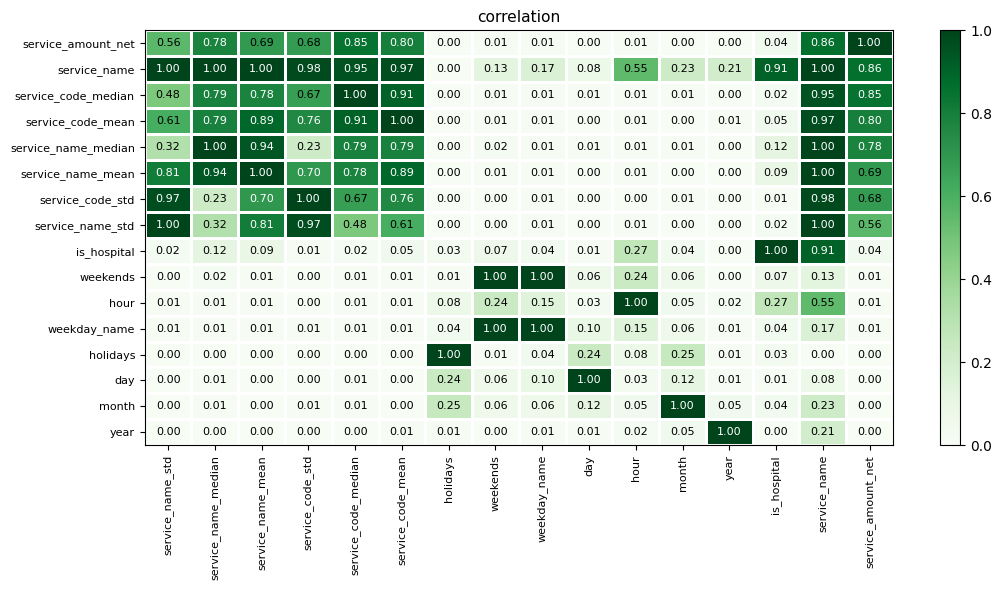

In [ ]:
p_o = data.drop(columns=['service_document_id', 'account_document_id', 'service_date', 'date', 'time', 'patient_id', 'service_code', 'delta_time']).phik_matrix().round(2).sort_values('service_amount_net')

plot_correlation_matrix(p_o.values,
                        x_labels=p_o.columns,
                        y_labels=p_o.index,
                        vmin=0,
                        vmax=1,
                        color_map="Greens",
                        fontsize_factor=0.8,
                        figsize=(11, 6)
                        )
plt.tight_layout()

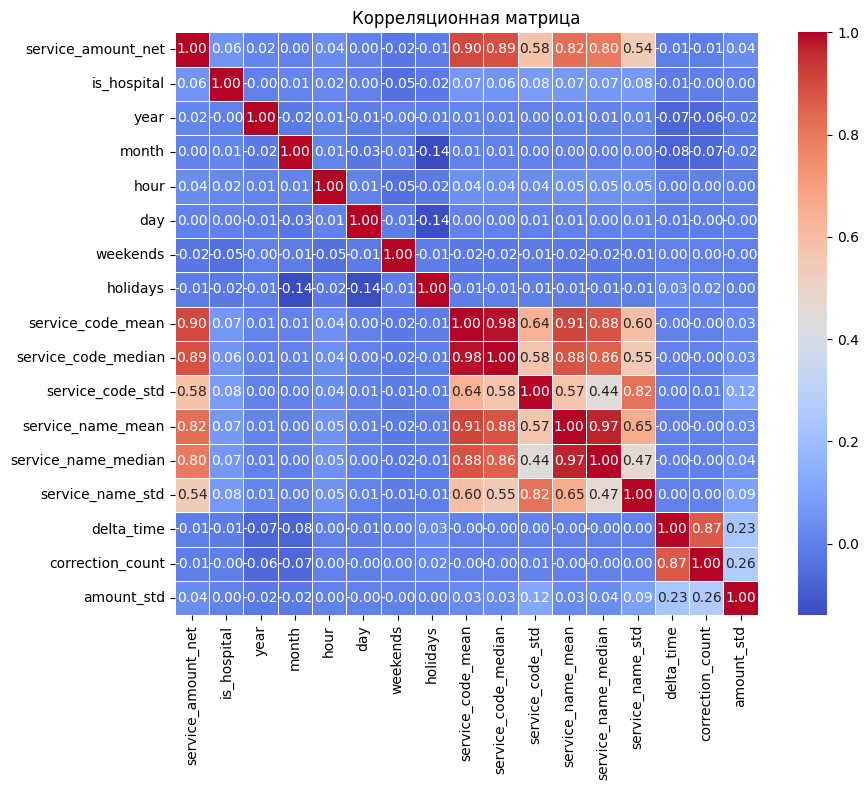

In [169]:
columns_to_exclude = ['service_document_id', 'account_document_id', 'service_date', 'date', 'time', 'patient_id', 'service_code', 'service_name', 'weekday_name',]
data_reduced = data.drop(columns=columns_to_exclude)

# Вычисляем корреляционную матрицу
correlation_matrix = data_reduced.corr()

# Визуализируем корреляционную матрицу с помощью seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Отображение значений корреляции на тепловой карте
    fmt=".2f",             # Формат отображения чисел (до двух знаков после запятой)
    cmap="coolwarm",       # Цветовая палитра
    cbar=True,             # Добавление цветовой шкалы
    square=True,           # Квадратные ячейки
    linewidths=0.5         # Ширина линий между ячейками
)
plt.title("Корреляционная матрица")  # Заголовок графика
plt.tight_layout()                   # Улучшение компоновки
plt.show()

In [ ]:
data.loc[data['service_code'] == '0xCDEA5658E0AD52E1700653CAE2A4928D', 'service_name'].value_counts()

,count
service_name,
0x95758EBA87326C4D5DECC8B51A8B9C61,16780


Получается, service_name - категории, а service_code - подкатегории в этих категориях

In [ ]:
data['service_document_id'].value_counts()[data['service_document_id'].value_counts() > 1]#.loc[data['service_document_id'].value_counts()['count'] > 1]

,count
service_document_id,
0x15075263622836BE21F6ACB4FA8E4BF3,5
0x864FB272E89454CD72197128F400BAAC,3
0x633F8A146E95A4D3658B22B260C75196,3
0xBE186EFDA44422D591A558F8CBE28564,3
0xDA04A42EC25E7DF616078B7DA0E8FC5E,3
...,...
0x73E0EAEAC5E8E5283C798E394D1F29DB,2
0x78AB2DBC1B41C19920E934B5401E71B2,2
0xD6E1F1B7FC9447677271FAB94421F536,2


In [ ]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time
298369,0x15075263622836BE21F6ACB4FA8E4BF3,0xE3AD0B25AAB74181C30E1895104D2C04,2022-07-31 18:07:00,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,2022-07-31,18:07:00
394920,0x15075263622836BE21F6ACB4FA8E4BF3,0x025EEF6559D288810B72E30DA01C72BC,2022-10-06 15:57:31,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:31
394921,0x15075263622836BE21F6ACB4FA8E4BF3,0xC957FFB34F7C95C41DA082B6ECB21592,2022-10-06 15:57:31,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:31
394922,0x15075263622836BE21F6ACB4FA8E4BF3,0x5220BB151561EBCC97CE43EAFC084896,2022-10-06 15:57:57,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:57
394923,0x15075263622836BE21F6ACB4FA8E4BF3,0x6B0CF840E51EF9A9B86E19CB514FB490,2022-10-06 15:57:57,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:57


In [ ]:
data['patient_id'].value_counts()

,count
patient_id,
0x037AB9CF4BAF80A173679FB9761A113D,4121
0xAECAFBEC992080A28B6351DC1E1551C2,2165
0x274B520D2D54E1604C6E69410A728CE0,1959
0xEA73B2A80C0D9647C3ABFA65195CFCBE,1951
0x53A2C720806E07E267EE2E32C7EEB8DF,1324
...,...
0xD1DFCC0E52753F953BEF98BC629E916B,1
0x1FAE39ACE7A65D71654A89B62643861F,1
0x028EDAC6500596FC82AF669C3CC0E973,1


In [ ]:
def add_rpss2022(date):
    return 1 if pd.Timestamp("2022-11-28") <= date <= pd.Timestamp("2023-01-31") else 0

def add_save25(date):
    return 1 if pd.Timestamp("2022-02-04") <= date <= pd.Timestamp("2022-02-20") else 0

def add_dedmraz(date):
    return 1 if pd.Timestamp("2022-01-01") <= date <= pd.Timestamp("2022-01-20") else 0

def add_greenday(date):
    return 1 if pd.Timestamp("2023-11-09") <= date <= pd.Timestamp("2023-11-12") else 0

def add_skidkanastrovku(date):
    return 1 if pd.Timestamp("2023-10-10") <= date <= pd.Timestamp("2023-11-08") else 0

def add_rpss2023(date):
    return 1 if pd.Timestamp("2023-06-13") <= date <= pd.Timestamp("2023-08-31") else 0

def add_sberagifinancy(date):
    return 1 if pd.Timestamp("2023-05-29") <= date <= pd.Timestamp("2023-07-09") else 0

In [ ]:
data["RPSS2022"] = data["service_date"].apply(add_rpss2022)
data["SAVE25"] = data["service_date"].apply(add_save25)
data["DEDMRAZ"] = data["service_date"].apply(add_dedmraz)
data["GREENDAY"] = data["service_date"].apply(add_greenday)
data["SKIDKANASTRAHOVKU"] = data["service_date"].apply(add_skidkanastrovku)
data["RPSS2023"] = data["service_date"].apply(add_rpss2023)
data["SBEREGIFINANCY"] = data["service_date"].apply(add_sberagifinancy)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
num_cols = ['service_amount_net', "RPSS2022", "SAVE25", "DEDMRAZ", "GREENDAY", "SKIDKANASTRAHOVKU", "RPSS2023", "SBEREGIFINANCY"]

<Axes: >

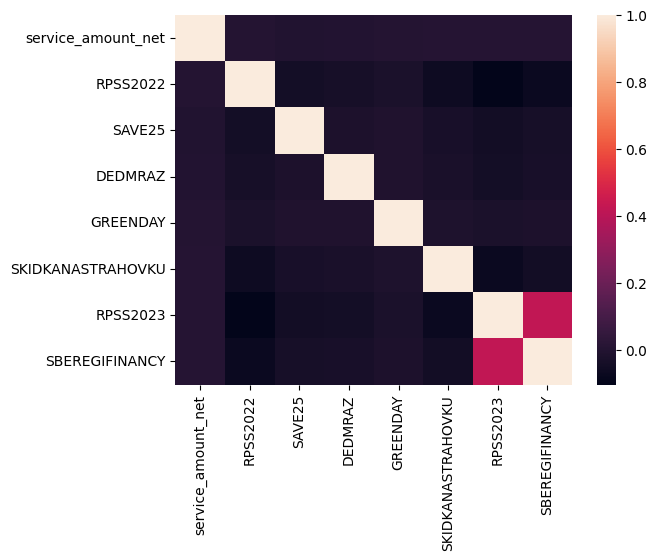

In [ ]:
corr = data[num_cols].corr()
sns.heatmap(corr)

In [ ]:
data.isna().sum()

,0
service_document_id,0
account_document_id,0
service_date,0
service_amount_net,0
patient_id,0
service_code,0
service_name,0
is_hospital,0
year,0
month,0


In [ ]:
import numpy as np

In [ ]:
data.to_csv('/content/drive/MyDrive/data_akcii.csv')

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(data[['service_amount_net']])
for i in range(len(akcii)):
    y = data[akcii[i]]

    logit_model = sm.Logit(y, X)
    result = logit_model.fit()

    # Выводим результаты
    #print(result.summary())

    # Псевдо-R^2 (например, McFadden's R^2)
    pseudo_r2 = result.prsquared
    print(f'\n{akcii[i]}: \n')
    print(f"Pseudo R-squared: {pseudo_r2}")

    # Проверка статистической значимости модели
    # Likelihood Ratio Test (LR-test)
    llr_pvalue = result.llr_pvalue
    print(f"p-value for Likelihood Ratio Test: {llr_pvalue} \n")

Optimization terminated successfully.
         Current function value: 0.284132
         Iterations 6

RPSS2022: 

Pseudo R-squared: 9.495413614279968e-07
p-value for Likelihood Ratio Test: 0.442915528815946 

Optimization terminated successfully.
         Current function value: 0.100813
         Iterations 8

SAVE25: 

Pseudo R-squared: 0.00013740934818640138
p-value for Likelihood Ratio Test: 3.8337614495753936e-08 

Optimization terminated successfully.
         Current function value: 0.081109
         Iterations 8

DEDMRAZ: 

Pseudo R-squared: 8.271009884153191e-05
p-value for Likelihood Ratio Test: 0.00013013070340856268 

Optimization terminated successfully.
         Current function value: 0.032651
         Iterations 9

GREENDAY: 

Pseudo R-squared: 2.752545251694105e-05
p-value for Likelihood Ratio Test: 0.16138745529000997 

Optimization terminated successfully.
         Current function value: 0.174162
         Iterations 7

SKIDKANASTRAHOVKU: 

Pseudo R-squared: 5.810494

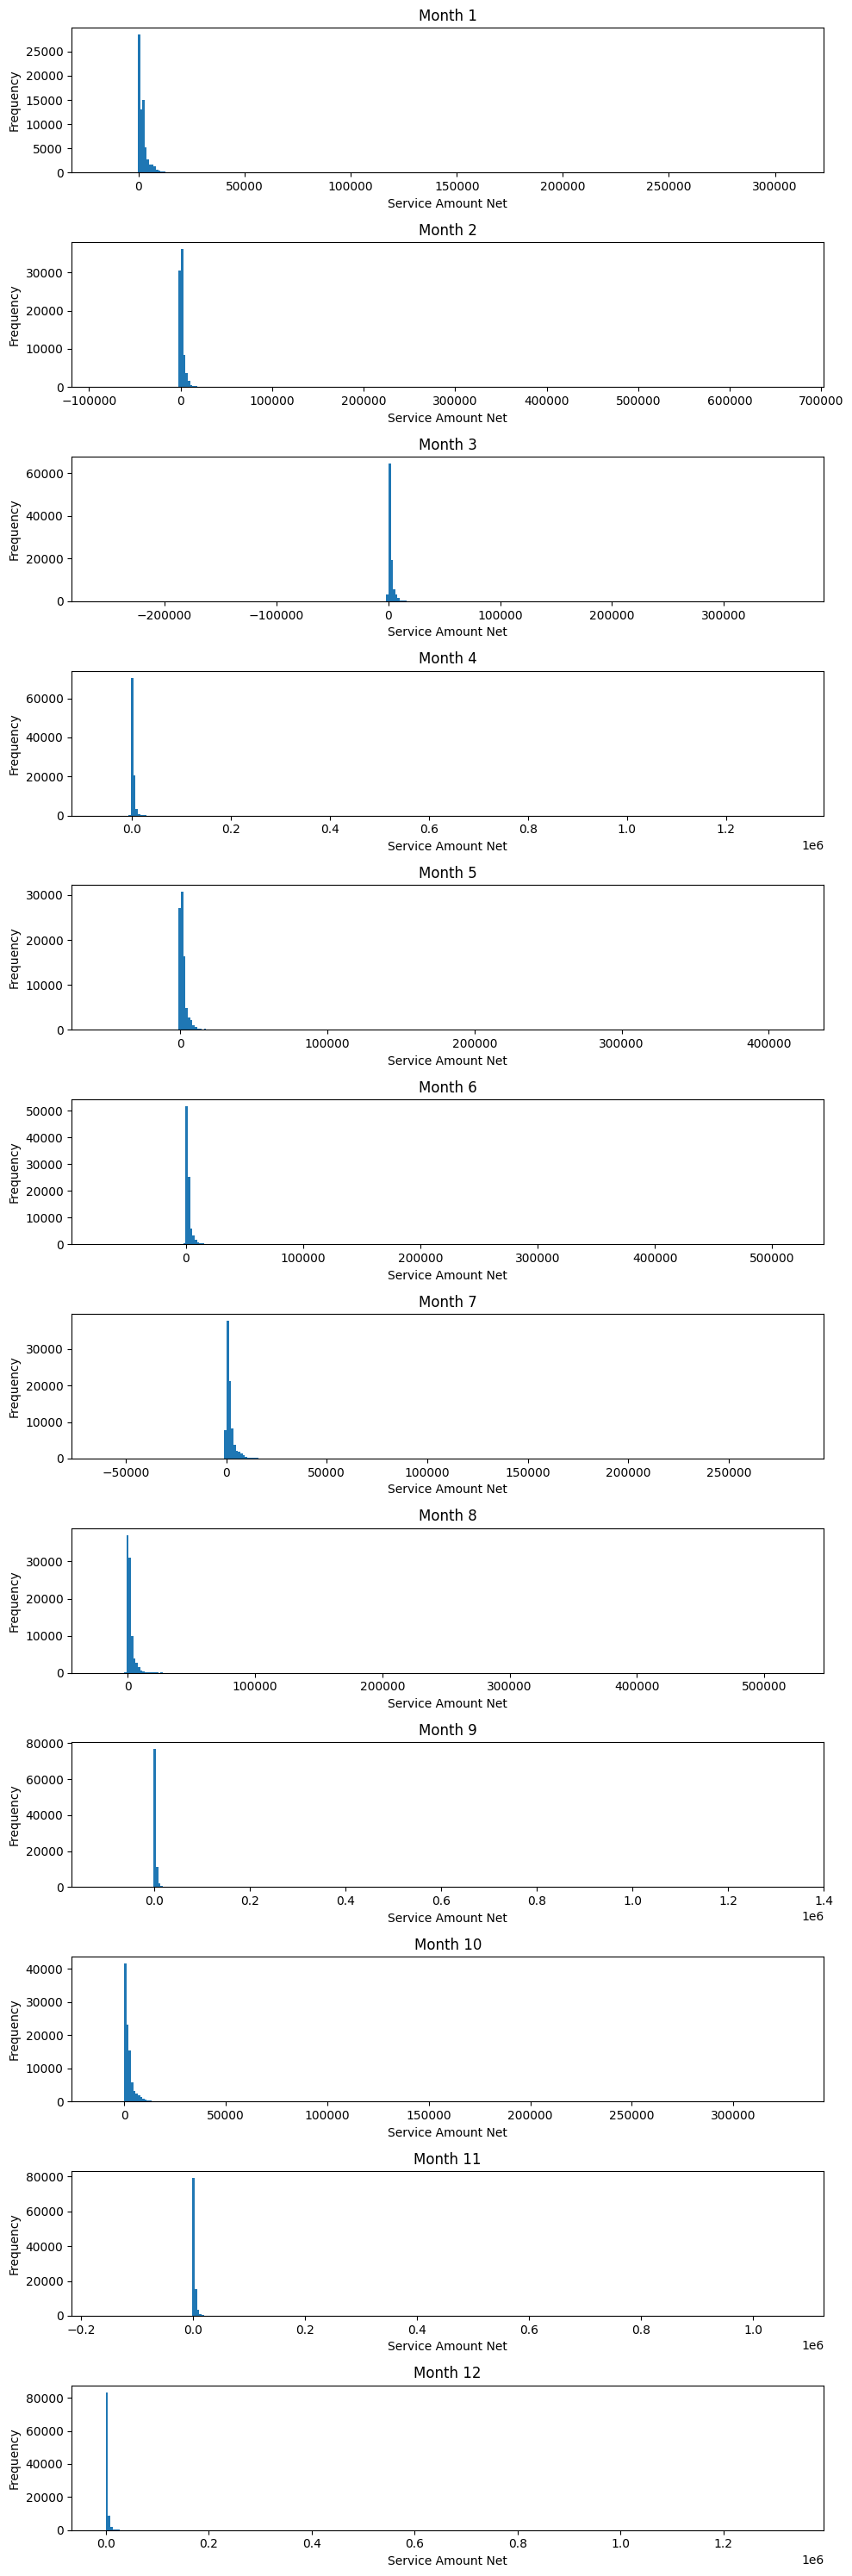

In [ ]:
fig, axes = plt.subplots(12, 1, figsize=(10, 30))
for i in range(1, 13):
    data_month = data.loc[(data['month'] == i) &
                         (data['service_amount_net'] > -10000000) &
                         (data['service_amount_net'] < 10000000)]
    axes[i-1].hist(data_month['service_amount_net'], bins=300)
    axes[i-1].set_title(f'Month {i}')
    axes[i-1].set_xlabel('Service Amount Net')
    axes[i-1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()